In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

# 3. Categorical Plots

- Categorical Scatter Plot
    - Stripplot
    - Swarmplot
    

- Categorical Distribution Plots
    - Boxplot
    - Violinplot
    

- Categorical Estimate Plot -> For Central Tendency
    - Barplot
    - Pointplot
    - Countplot
    
    
#### Figure Level Function -> `catplot`

## 3.1. Categorical Scatter Plot

- Bivariate Analysis
- Categorical Variable vs Numerical Variable

### 3.1.1. Stripplot

- Suitable for smaller datasets

<AxesSubplot:xlabel='day', ylabel='total_bill'>

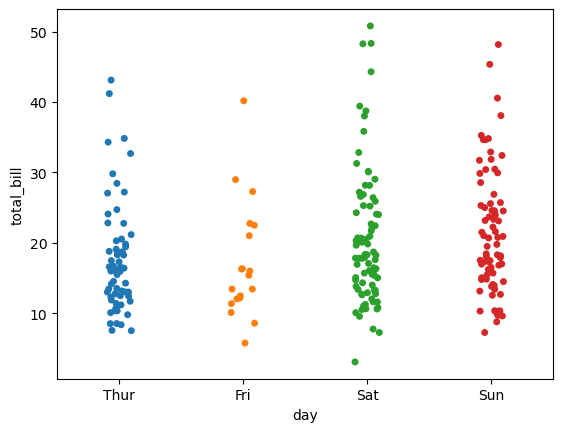

In [6]:
# To improve the redability, seaborn internally adds the small random noise and hence we see the spread.
sns.stripplot(data=tips, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

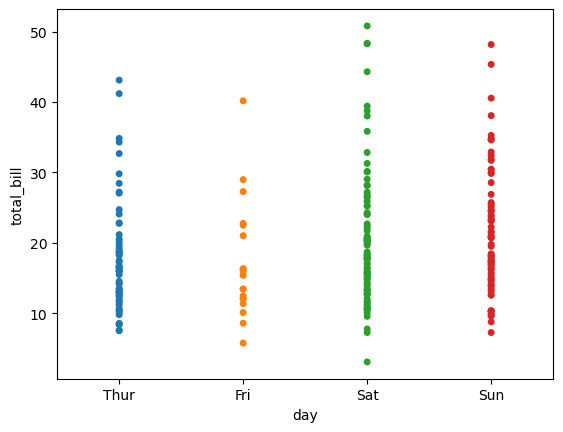

In [7]:
# also we can pass 0-1 values for jitter -> to increase the spread
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False)

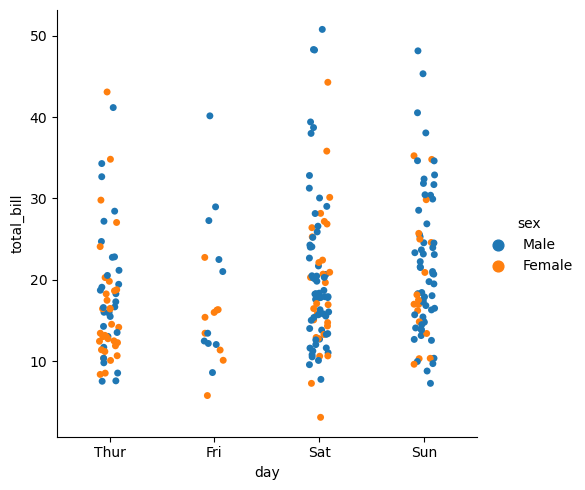

In [11]:
# using catplot -> figure level function
sns.catplot(data=tips, x='day', y='total_bill', kind='strip', hue='sex')

### 3.1.2. Swarmplot

- Suitable for medium to large datasets

<AxesSubplot:xlabel='day', ylabel='total_bill'>

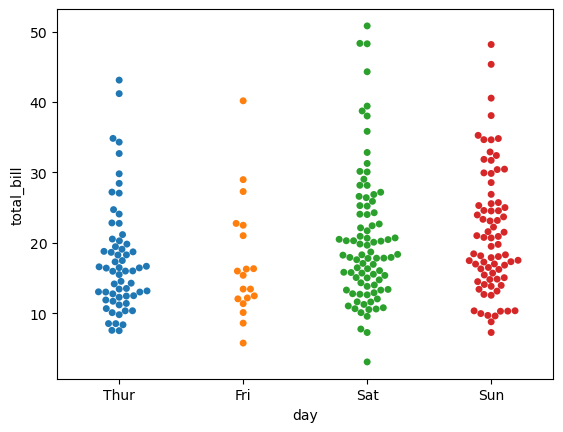

In [13]:
sns.swarmplot(data=tips, x='day', y='total_bill')

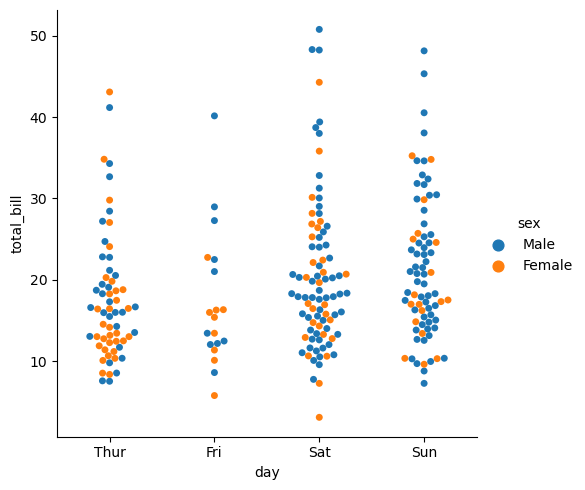

In [12]:
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='sex')

## 3.2. Categorical Distribution Plot

- Univariate Analysis

### 3.2.1 Box Plot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

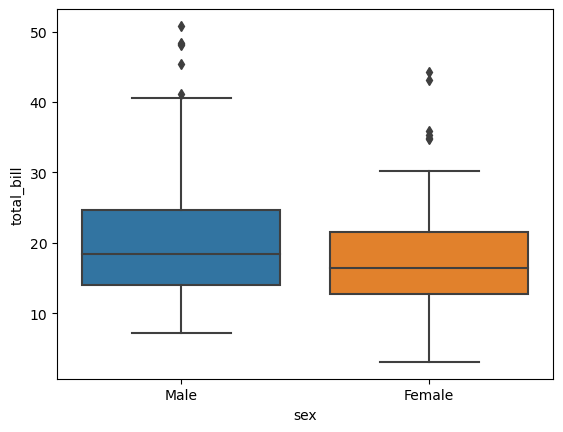

In [15]:
sns.boxplot(data=tips, x='sex', y='total_bill')

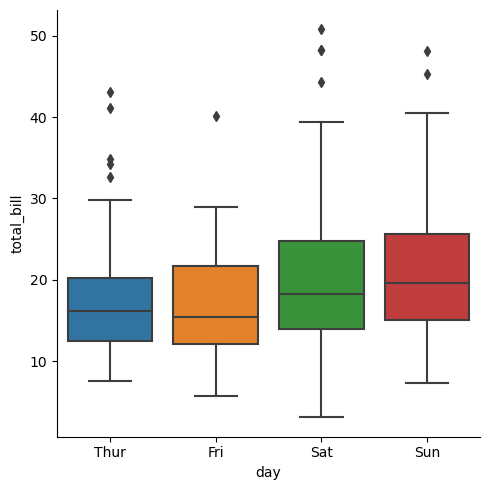

In [18]:
# using catplot
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

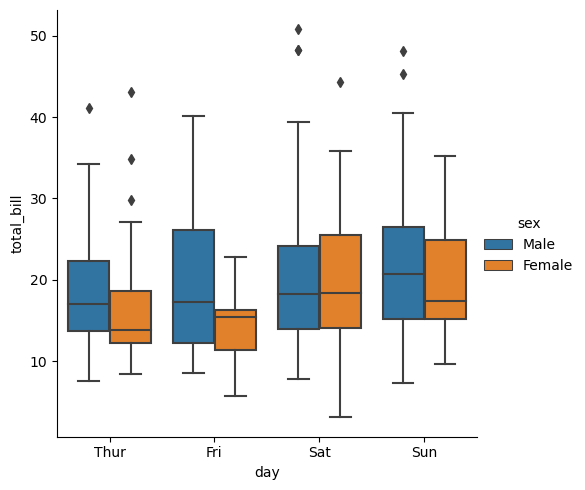

In [19]:
# hue 
sns.catplot(data=tips, x='day', y='total_bill', kind='box', hue='sex')

<AxesSubplot:ylabel='total_bill'>

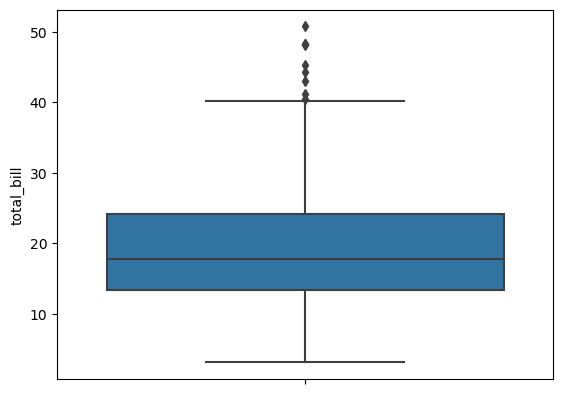

In [20]:
# single boxplot -> numerical column
sns.boxplot(data=tips, y='total_bill')

### 3.2.2 Violin Plot (Box Plot + KDE Plot)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

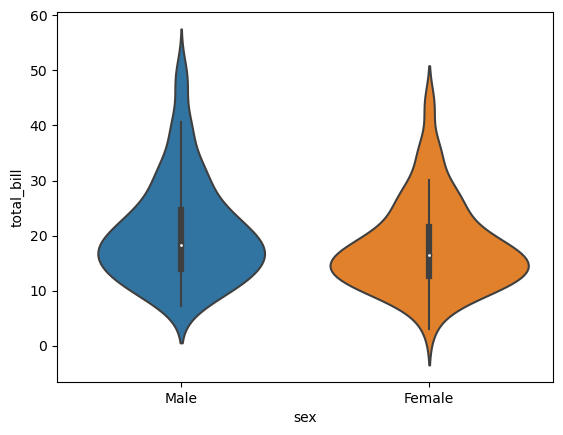

In [23]:
sns.violinplot(data=tips, x='sex', y='total_bill')

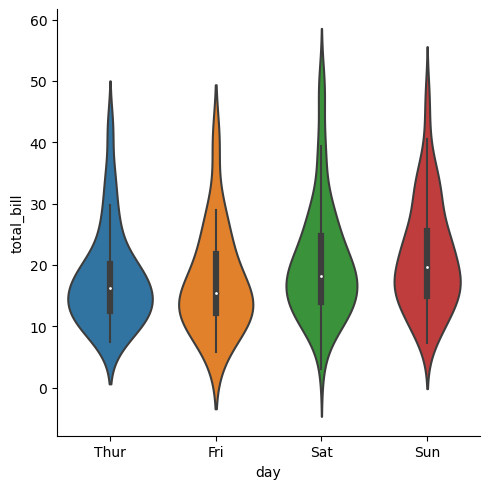

In [22]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')

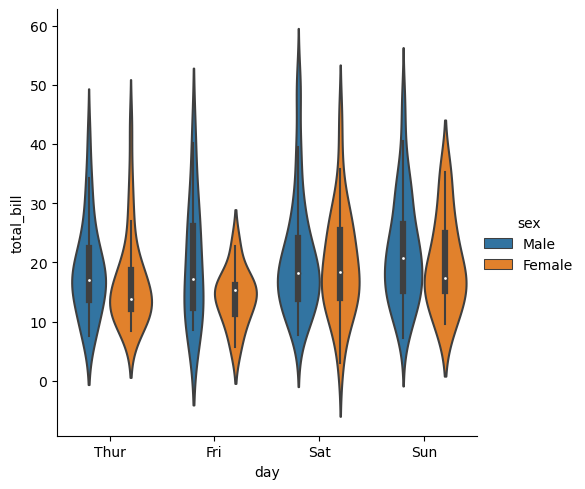

In [24]:
# hue
sns.catplot(data=tips, x='day', y='total_bill', kind='violin', hue='sex')

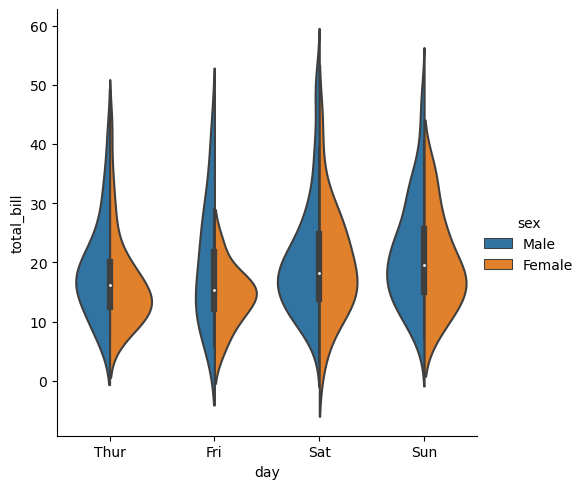

In [25]:
# split
sns.catplot(data=tips, x='day', y='total_bill', kind='violin', hue='sex', split=True)

## 3.3 Categorical Estimate Plot

### 3.3.1.  Bar Plot

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars (vertical black line)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

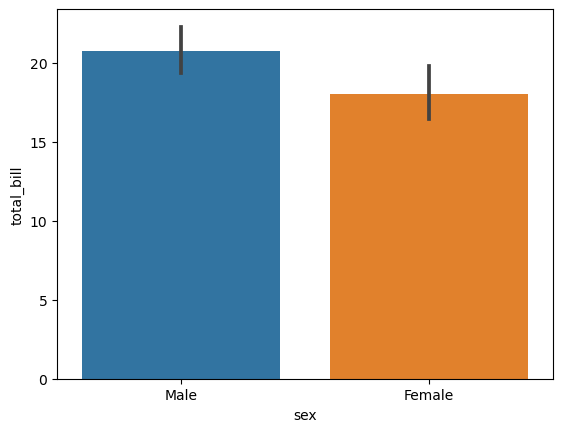

In [27]:
sns.barplot(data=tips, x='sex', y='total_bill')

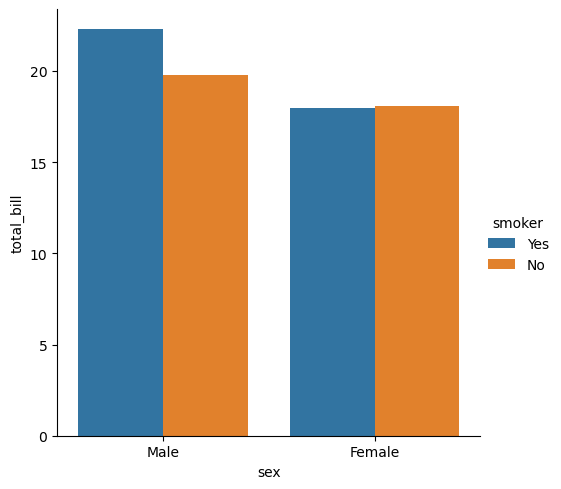

In [42]:
# removing the error bars
sns.catplot(data=tips, x='sex', y='total_bill', kind='bar', hue='smoker', ci=None)

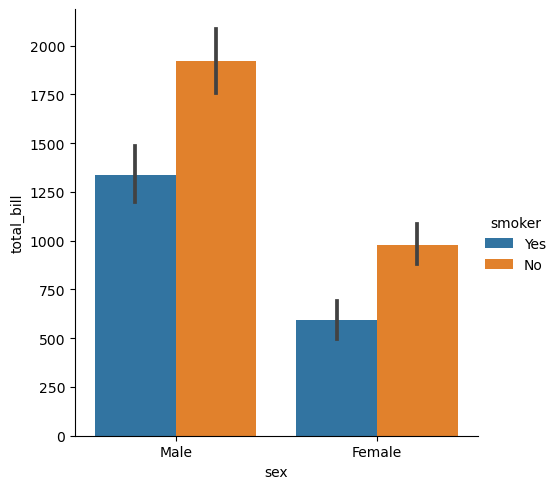

In [31]:
# estimator
import numpy as np
sns.catplot(data=tips, x='sex', y='total_bill', kind='bar', hue='smoker', estimator=np.sum)

### 3.3.2 Point Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

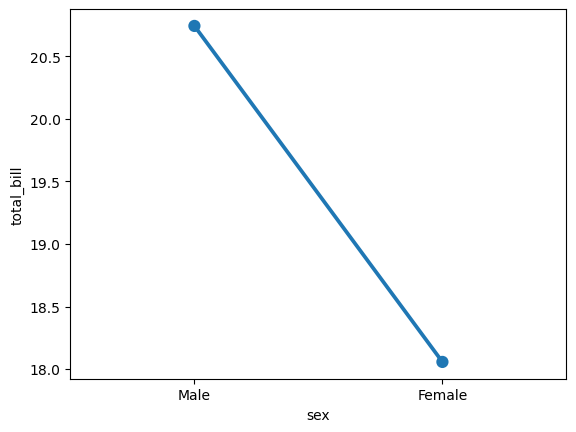

In [43]:
sns.pointplot(data=tips, x='sex', y='total_bill', kind='bar', ci=None)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

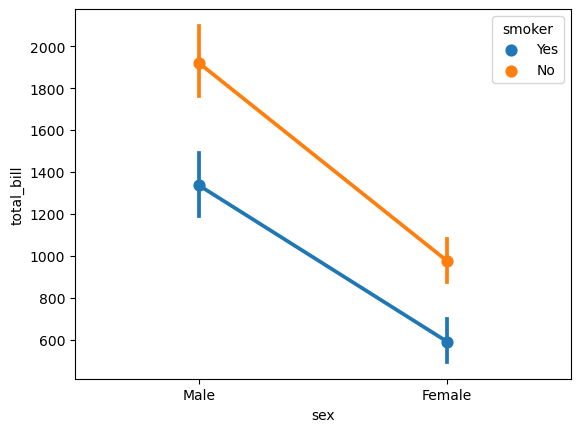

In [34]:
sns.pointplot(data=tips, x='sex', y='total_bill', kind='bar', hue='smoker', estimator=np.sum)

### 3.3.3 Count Plot

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative variable

<AxesSubplot:xlabel='sex', ylabel='count'>

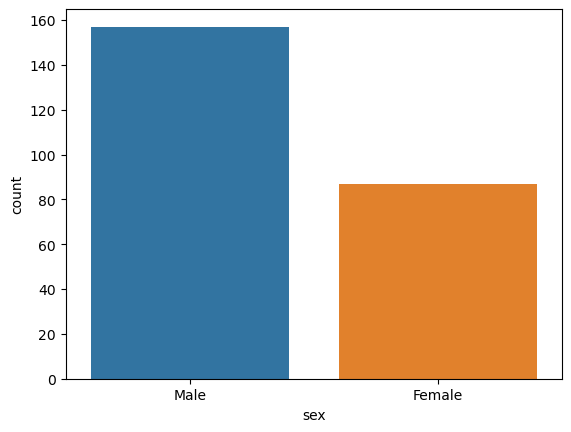

In [37]:
sns.countplot(data=tips, x='sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

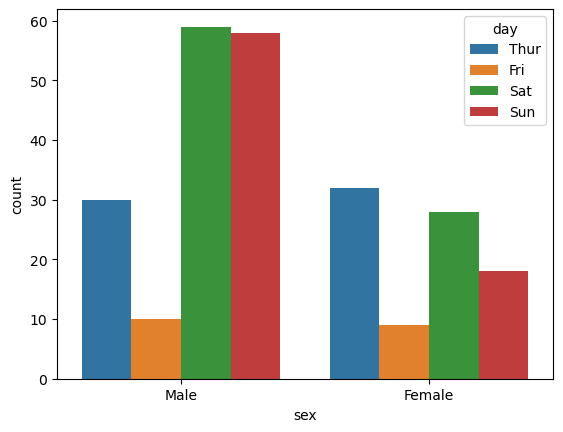

In [38]:
sns.countplot(data=tips, x='sex', hue='day')

<AxesSubplot:xlabel='sex', ylabel='count'>

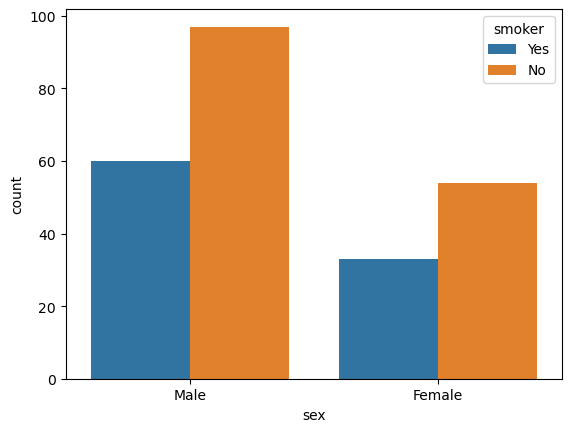

In [39]:
sns.countplot(data=tips, x='sex', hue='smoker')

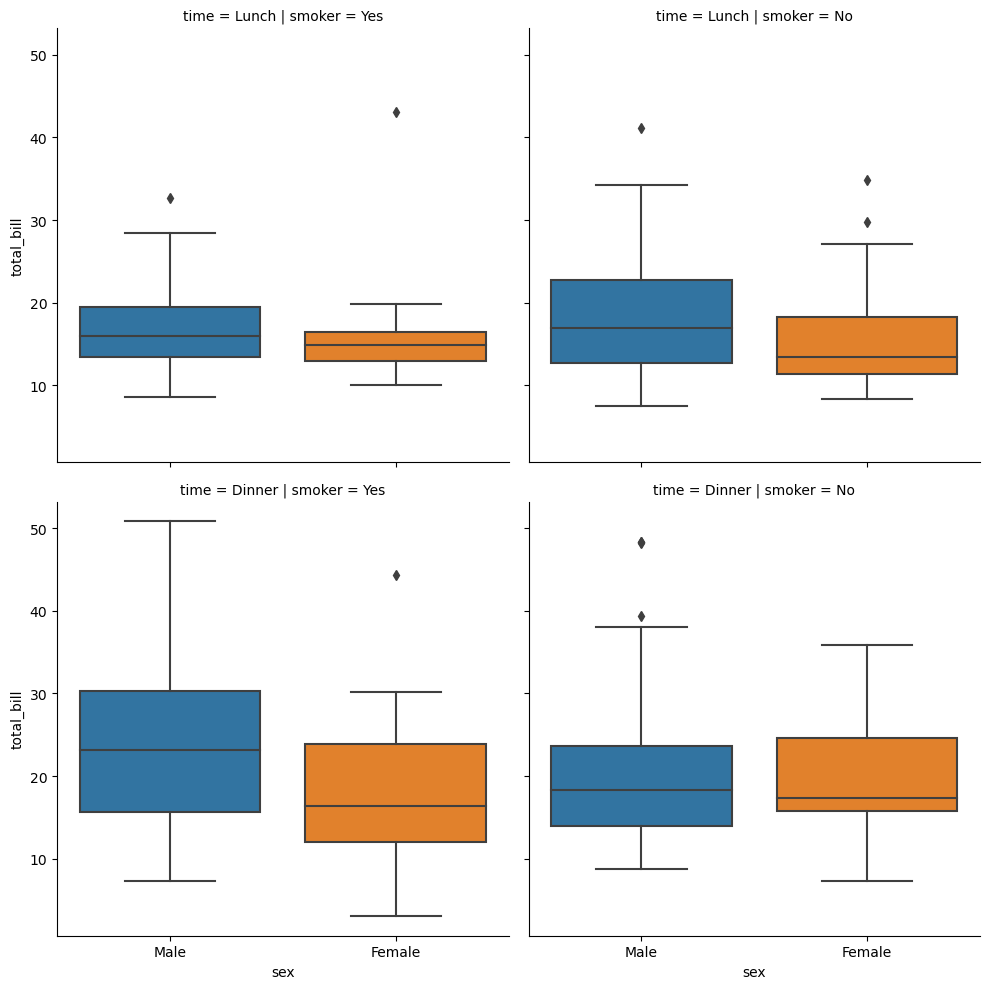

In [41]:
# faceting using catplot
sns.catplot(data=tips, x='sex', y='total_bill', row='time', col='smoker', kind='box')

<br>
<br>

# 4. Regression Plots

- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

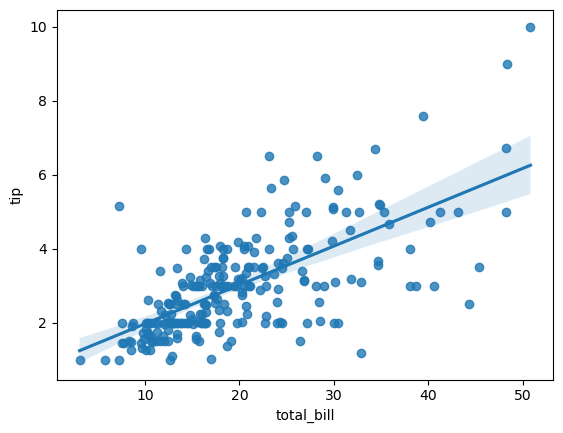

In [45]:
# axes level function
# hue parameter is not available
sns.regplot(data=tips, x='total_bill', y='tip')

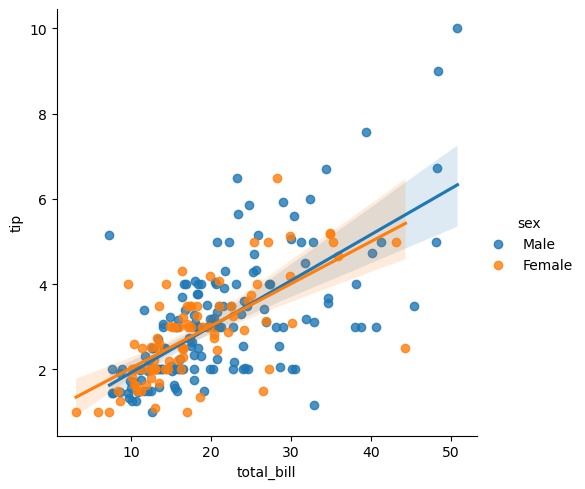

In [47]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

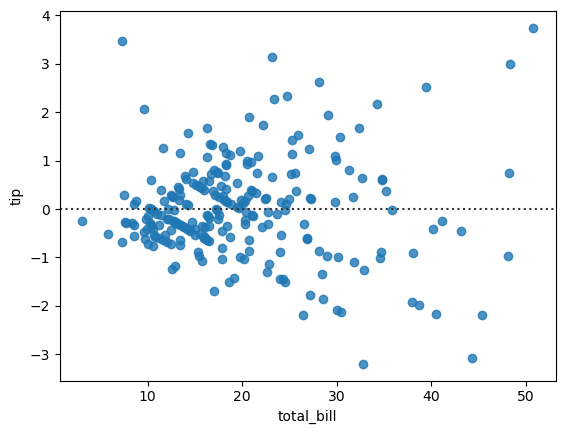

In [48]:
# residual plot
sns.residplot(data=tips, x='total_bill', y='tip')

<br>
<br>

# 5. Matrix Plot

## 5.1. Heatmap

- Plot rectangular data as a color-encoded matrix.

In [49]:
gap = px.data.gapminder()
gap.sample(1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
513,Ethiopia,Africa,1997,49.402,59861301,515.889401,ETH,231


In [50]:
temp_df = gap.pivot(index='country', columns='year', values='lifeExp')
temp_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


<AxesSubplot:xlabel='year', ylabel='country'>

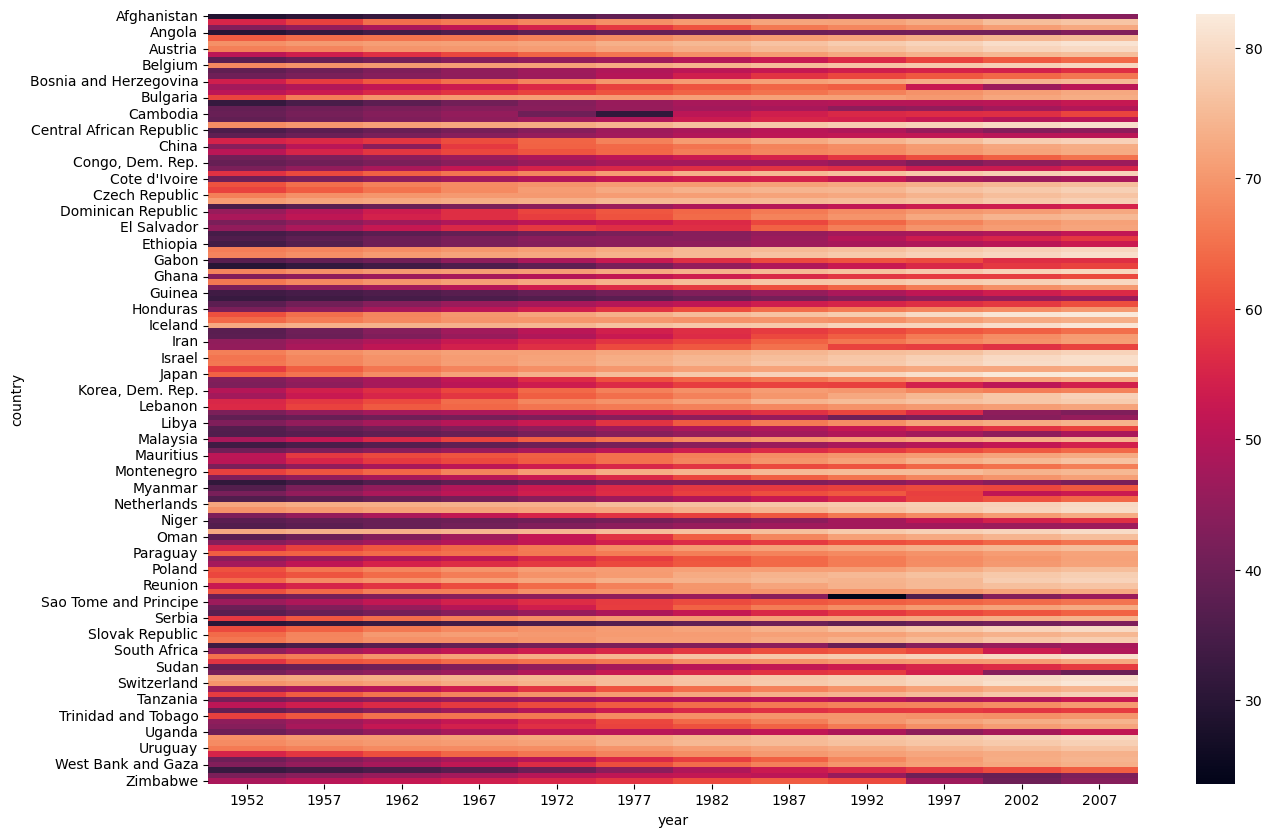

In [51]:
# heatmap -> axes level function
plt.figure(figsize=(15,10))
sns.heatmap(temp_df)

<AxesSubplot:xlabel='year', ylabel='country'>

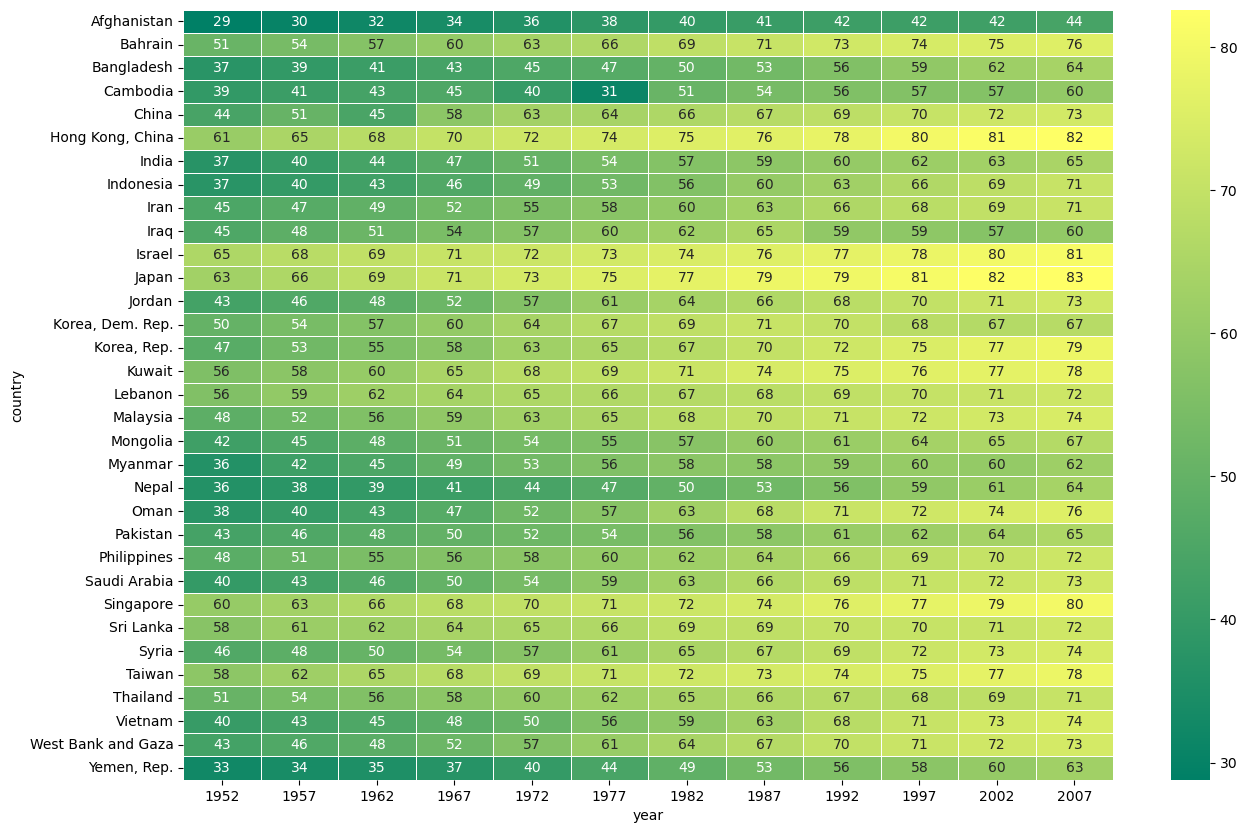

In [52]:
# annot
temp_df = gap[gap['continent'] == 'Asia'].pivot(index='country', columns='year', values='lifeExp')

plt.figure(figsize=(15,10))
sns.heatmap(temp_df, annot=True, linewidth=0.5, cmap='summer')

## 5.2. Clustermap

- Plot a matrix dataset as a hierarchically-clustered heatmap.
- This function requires scipy to be available.

In [53]:
iris = px.data.iris()
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
54,6.5,2.8,4.6,1.5,versicolor,2


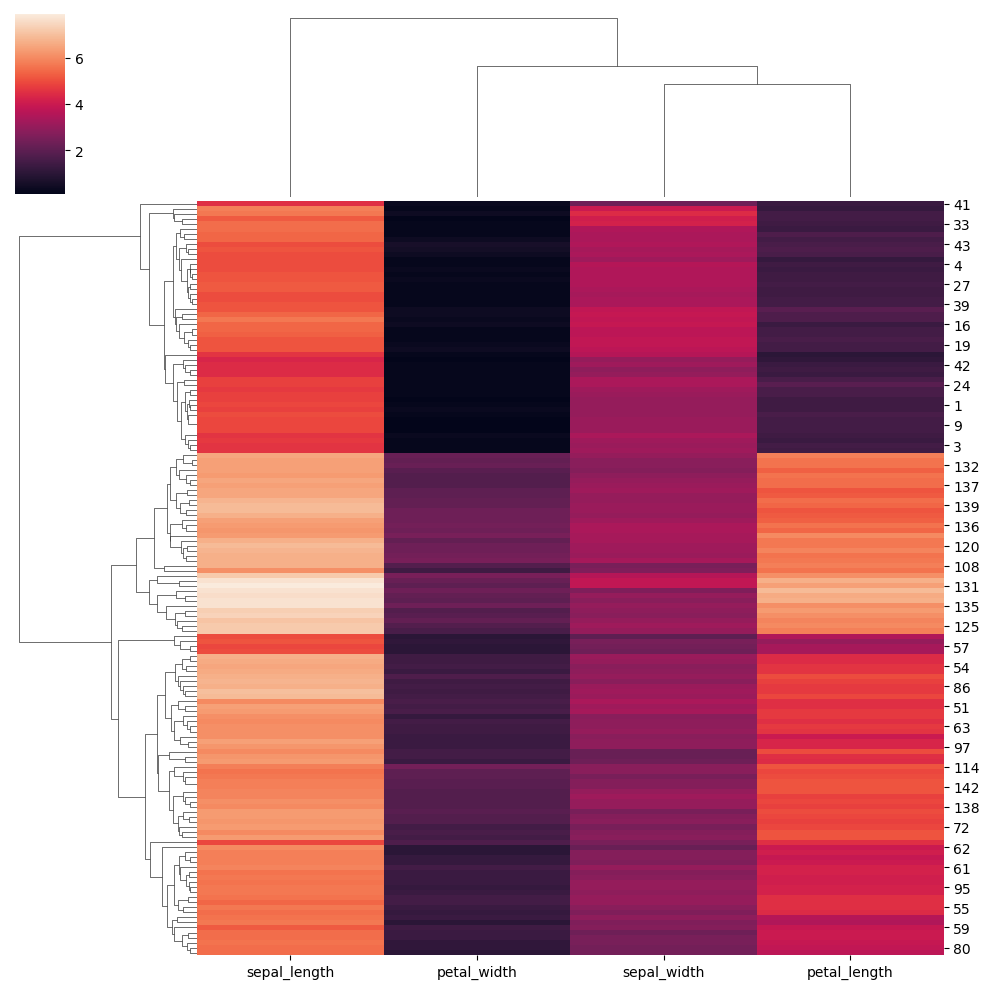

In [54]:
sns.clustermap(iris.iloc[:, [0,1,2,3]])

<br>
<br>

## A second way to plot Facet plots -> FacetGrid

- **Figure Level Functions** : relplot -> displot -> catplot -> lmplot (in-build functionality of facet plot)

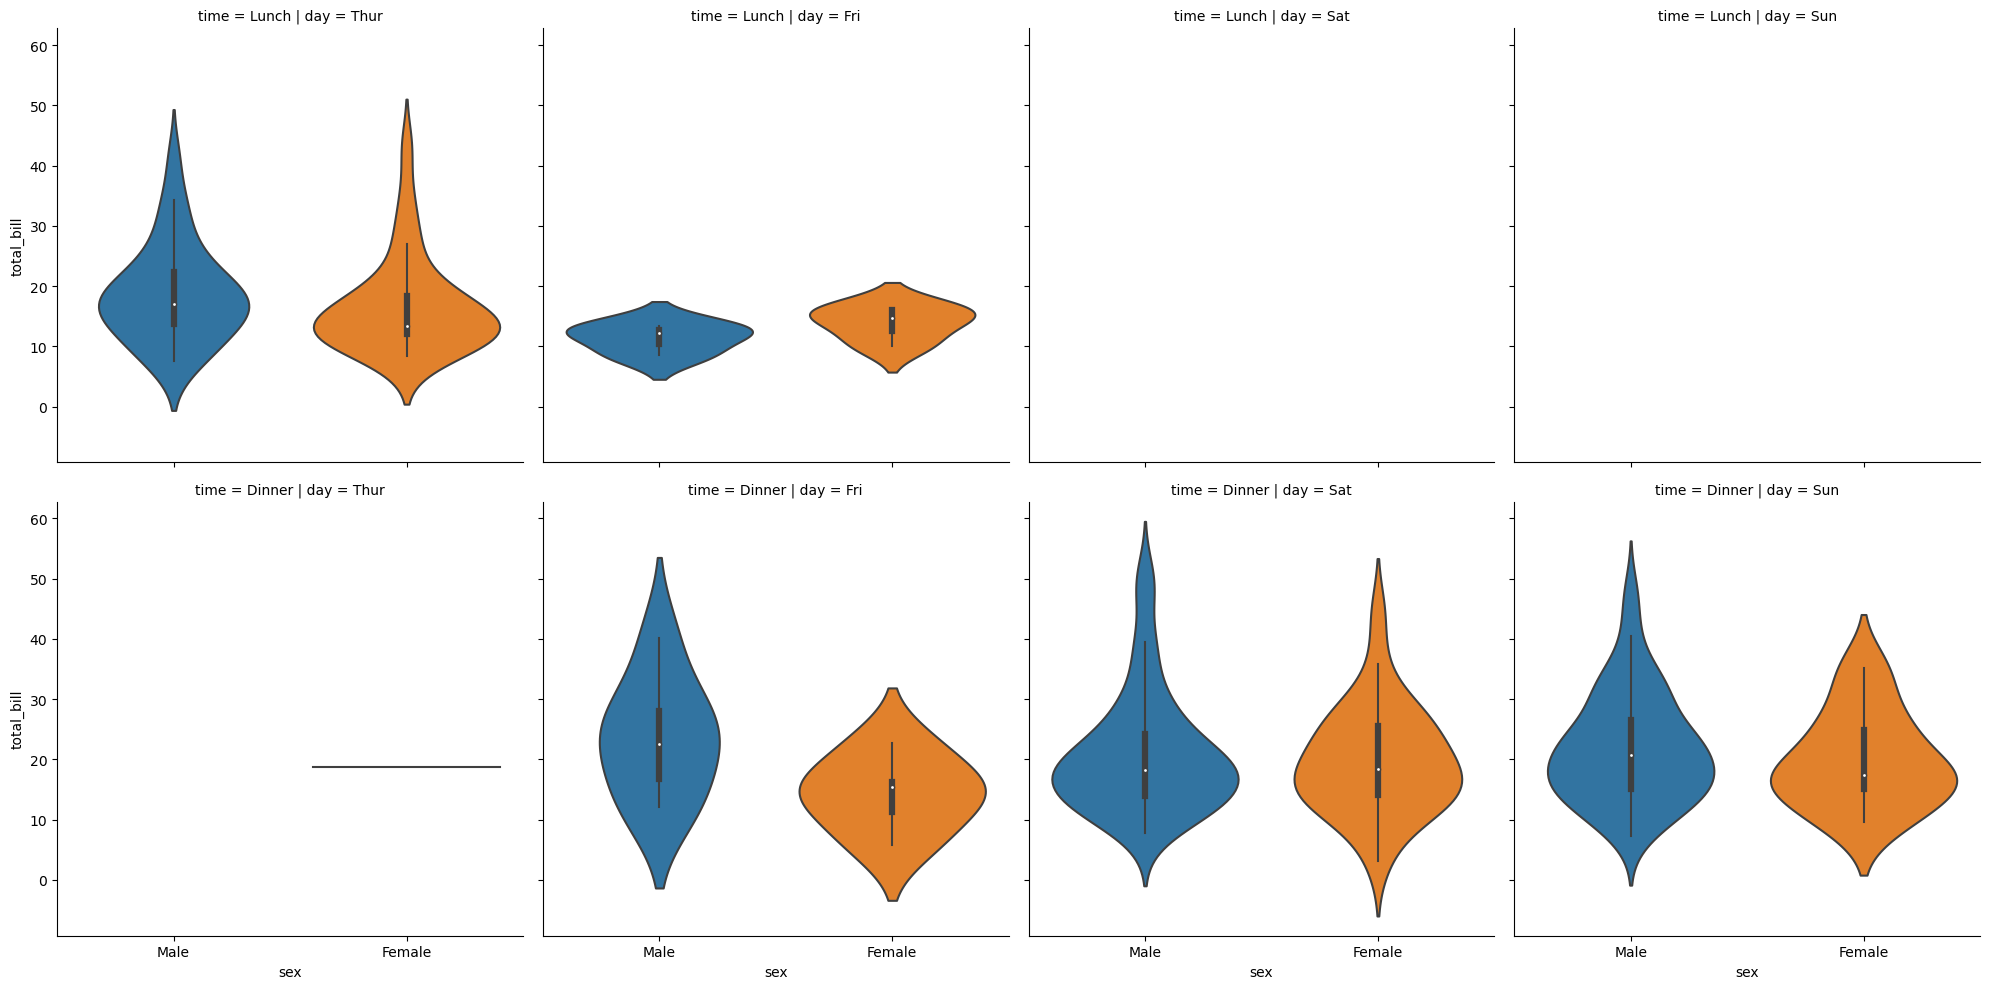

In [59]:
# Using Figure level function
sns.catplot(data=tips, x='sex', y='total_bill', kind='violin', row='time', col='day')

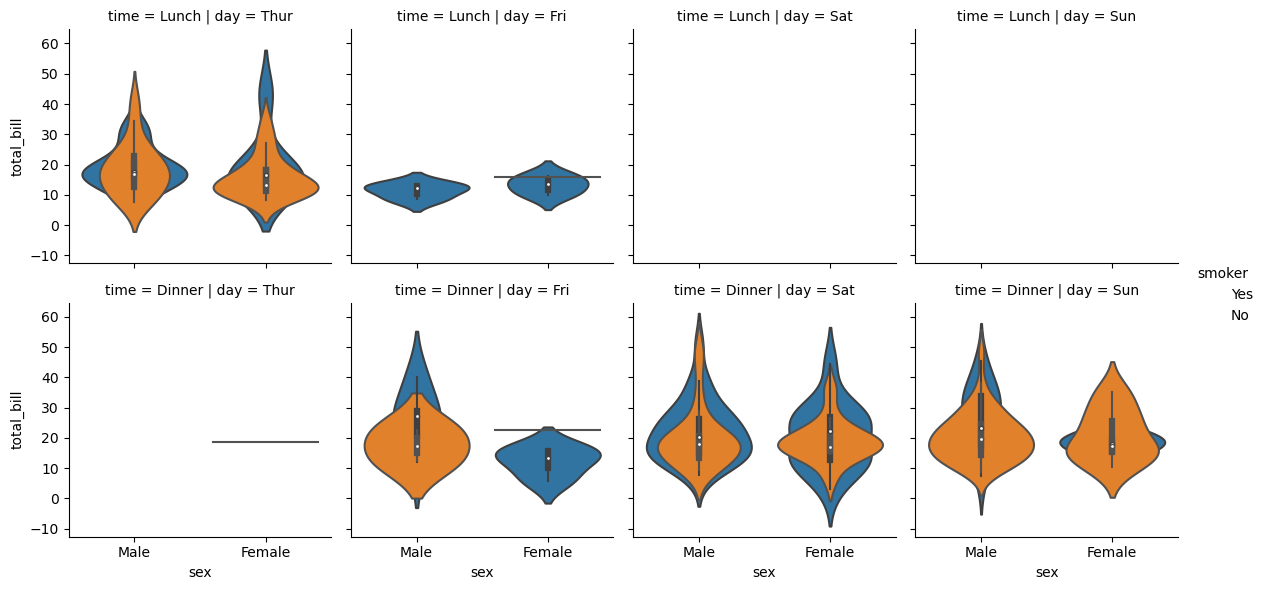

In [68]:
# another way
g = sns.FacetGrid(data=tips, col='day', row='time', hue='smoker')
g.map(sns.violinplot, 'sex', 'total_bill')

g.add_legend()

<br>
<br>

# 6. Multiplots

- pairplot
- jointplot

## 6.1. pairplot

- plotting pairwise relationship plot

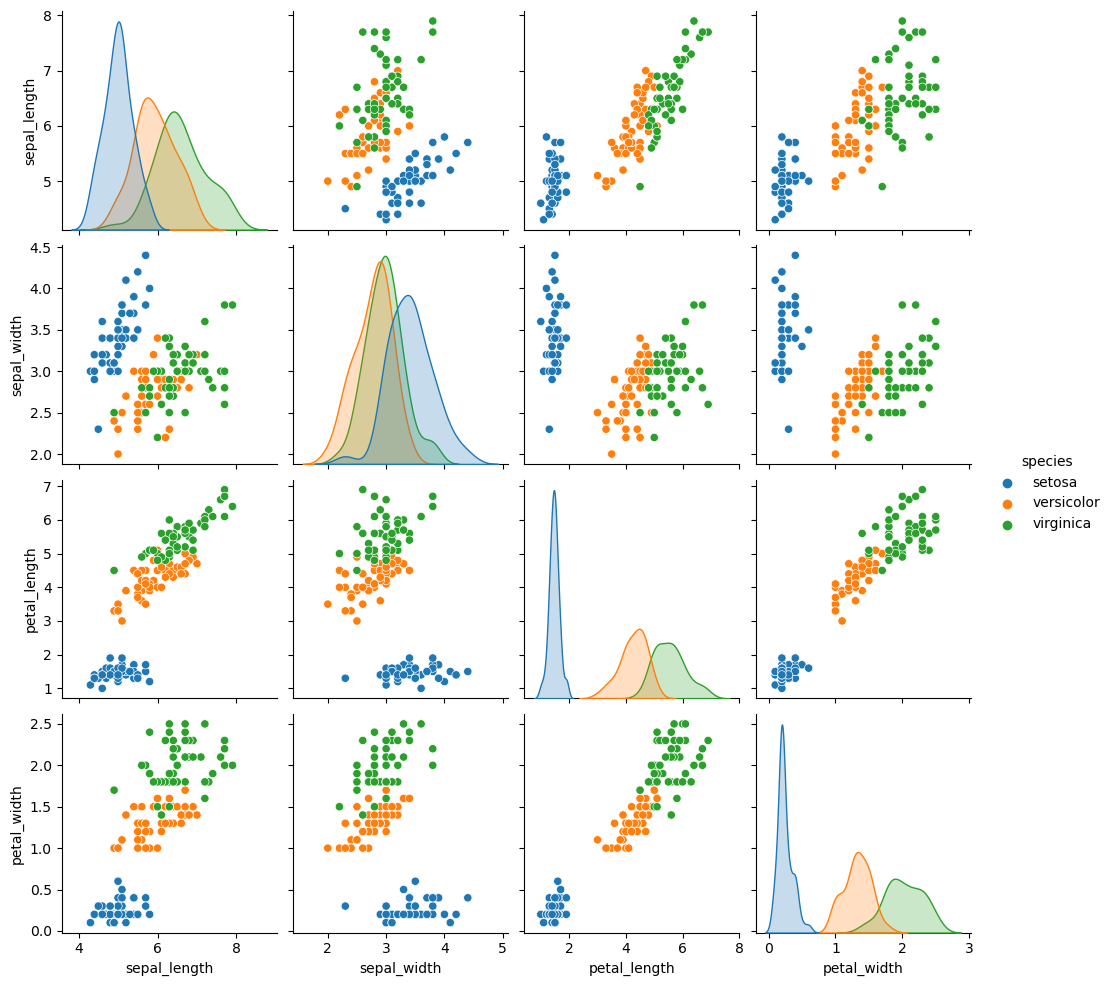

In [73]:
sns.pairplot(data=iris, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

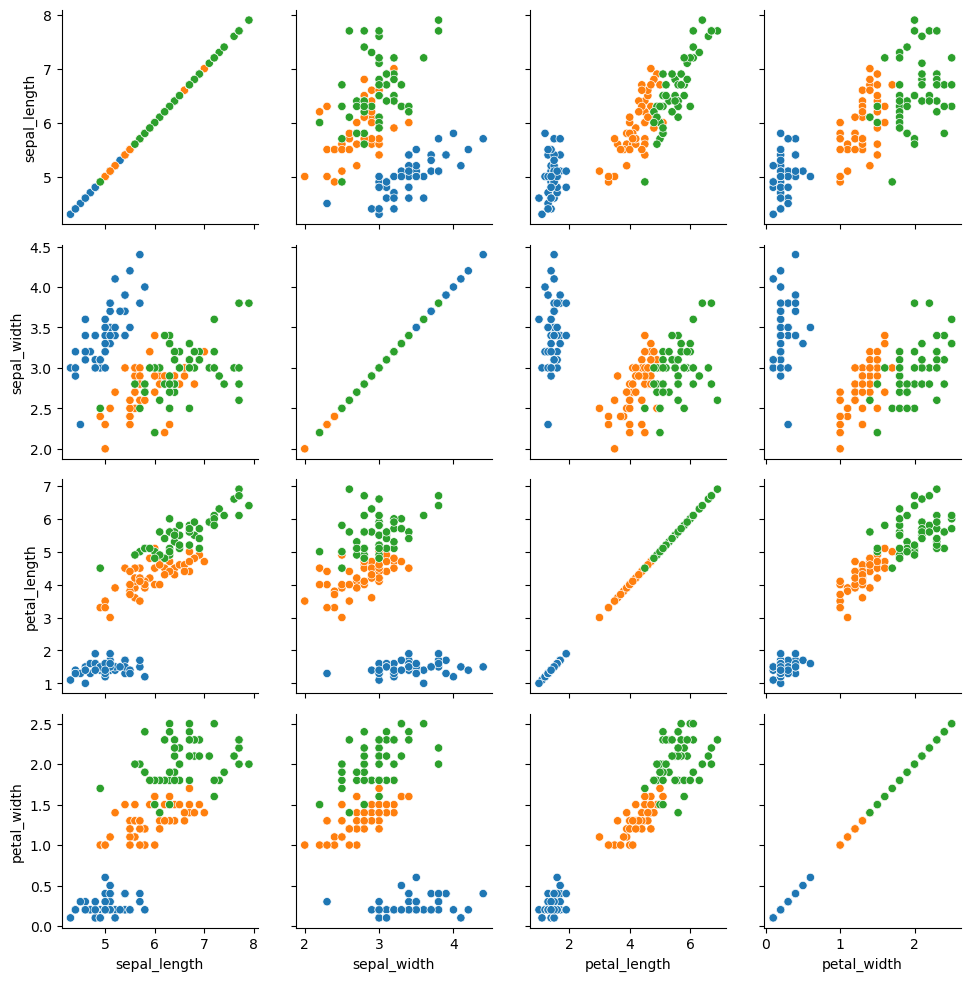

In [76]:
# pairgrid
g = sns.PairGrid(data=iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')
g.map(sns.scatterplot)

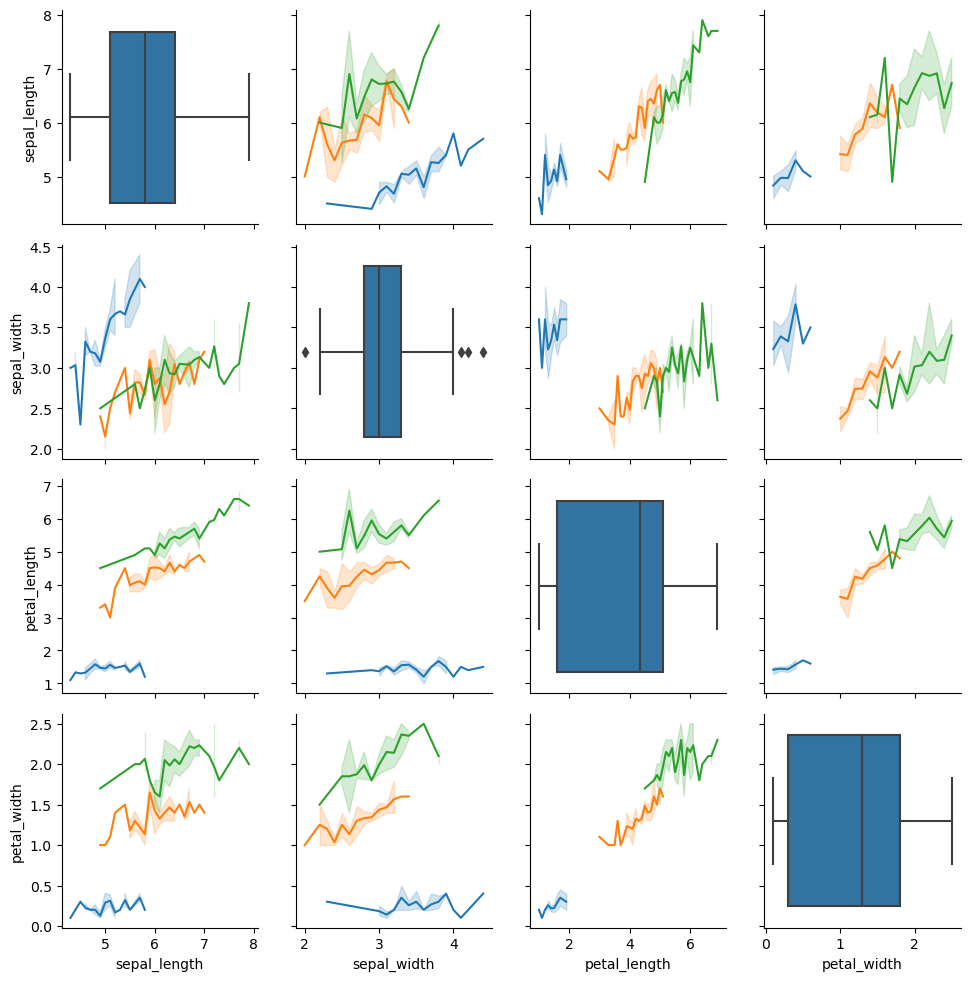

In [80]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')

# we can plot any plot of our choice
g.map_diag(sns.boxplot)
g.map_offdiag(sns.lineplot)

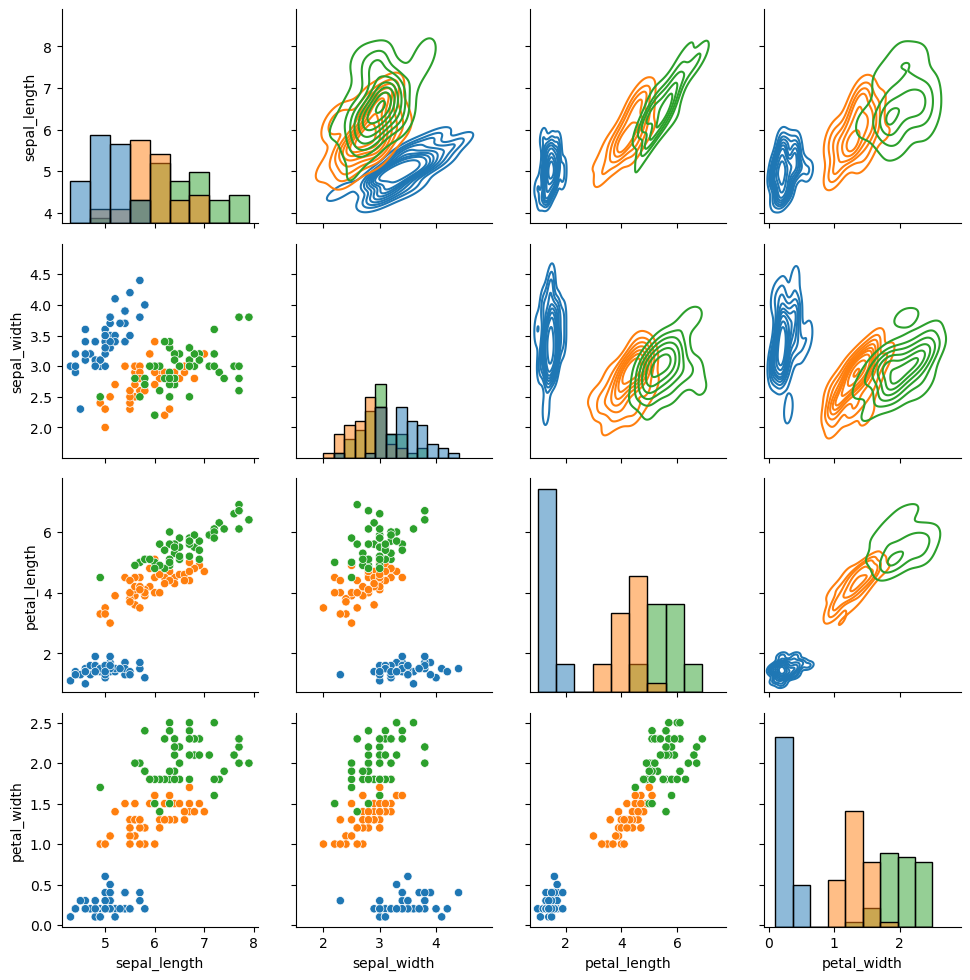

In [81]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')

# we can plot any plot of our choice
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

## 6.2 Jointplot

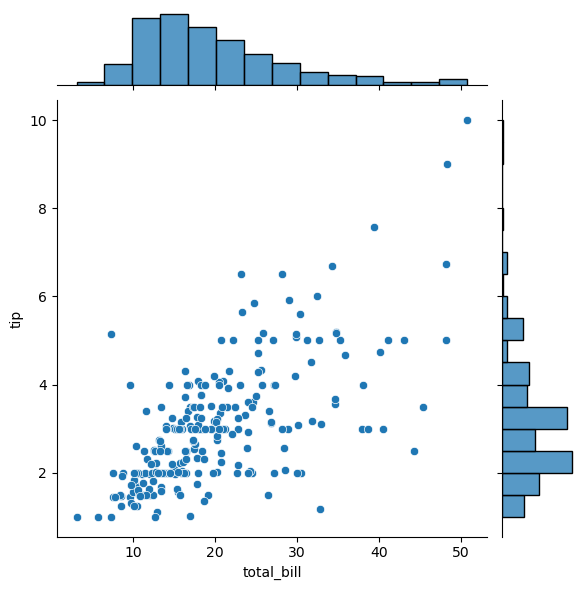

In [82]:
sns.jointplot(data=tips, x='total_bill', y='tip')

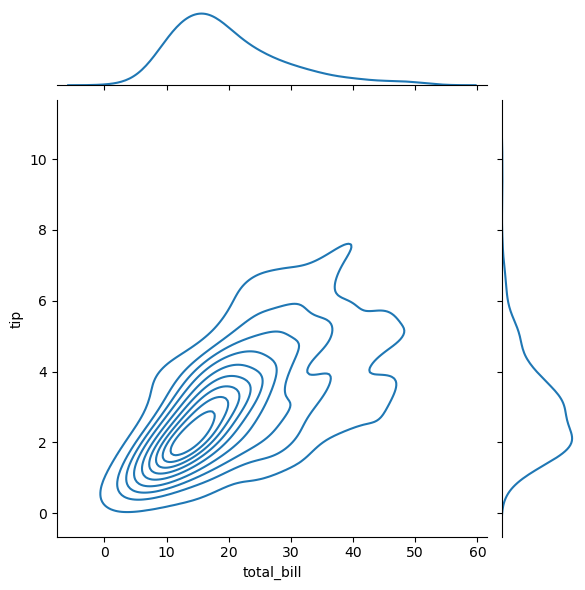

In [83]:
# kind
# kind : ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')

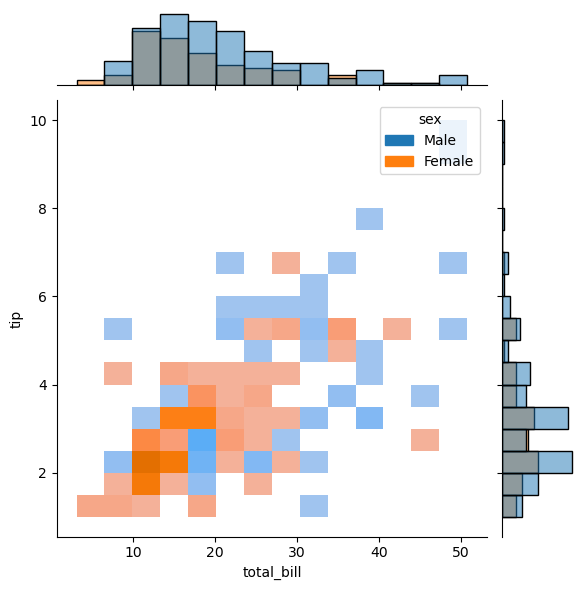

In [90]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hist', hue='sex')

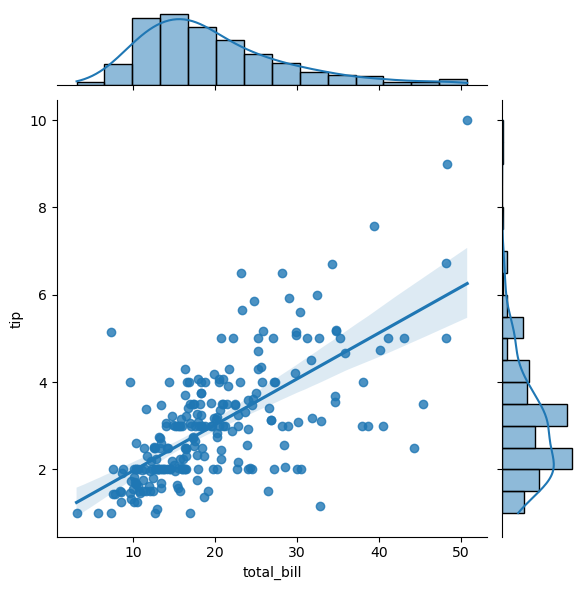

In [89]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

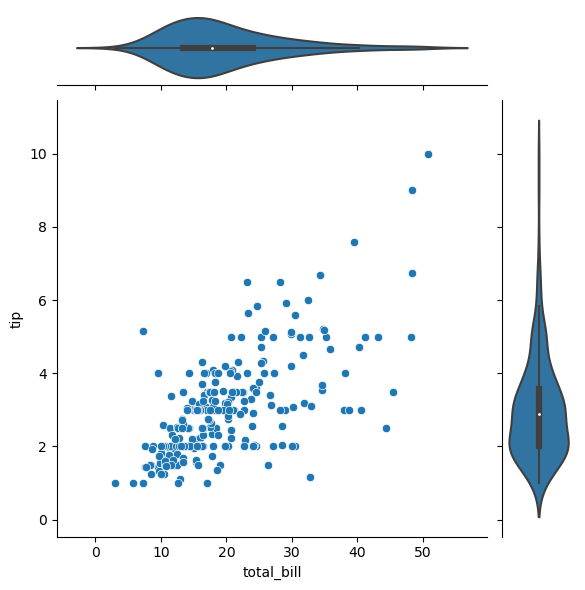

In [91]:
# jointgrid
g = sns.JointGrid(data=tips, x='total_bill', y='tip')
g.plot(sns.scatterplot, sns.violinplot)